In [13]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
pd.set_option('display.max_colwidth', -1)
import re

In [16]:
df = pd.read_csv('twint_sentiment_test.csv', usecols=['date', 'tweet', 'geo'])

In [ ]:
# df = pd.read_csv('test.csv')

In [17]:
df.head()

,date,tweet,geo
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.","41.881832,-87.623177,20km"
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things","41.881832,-87.623177,20km"
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,"41.881832,-87.623177,20km"
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,"41.881832,-87.623177,20km"
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.","41.881832,-87.623177,20km"


In [18]:
tweets = list(df['tweet'])
tweets[0]

'@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.'

## Vader

In [20]:
analyzer = SentimentIntensityAnalyzer()
df['vader_scores'] = df['tweet'].apply(lambda text: analyzer.polarity_scores(tweets))
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

KeyboardInterrupt: 

In [7]:
df['vader_sentiment']= ''

for row in df.index:
    if df['compound'][row] > 0:
        df['vader_sentiment'][row] = 'positive'
    elif df['compound'][row] == 0:
        df['vader_sentiment'][row] = 'neutral'
    elif df['compound'][row] < 0:
        df['vader_sentiment'][row] = 'negative'

C:\Users\christina.sarver\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\christina.sarver\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\christina.sarver\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [101]:
df.head()

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,retweets,favorites,location,vader_scores,compound,vader_sentiment
0,0,1406359961190363139,@fitterhappierAJ @DeannaMarie208 @SapnaKmd @VSLanziotti @BarneyUoB I do not know why mention the #vaccine here if 3 out of 6 even did not receive vaccine.,2,0,2021-06-19 21:15:18,Twitter Web App,1.406360e+18,0,2,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
1,1,1406336817415131140,The cold hard truth burned through your soul &amp; left you with doubt &amp; reason. \nHer backhanded compliment was at the forefront of disgrace &amp; treason.\n\n #quotes #loveislove #tuesdaymotivations #Trending #WednesdayMotivation #comedy #wednesdaythought #LGBTQ #tuesdayvibe #vaccine,0,0,2021-06-19 19:43:20,Twitter Web App,NaN,0,0,Los Angeles,"{'neg': 0.213, 'neu': 0.618, 'pos': 0.168, 'compound': -0.2732}",-0.2732,negative
2,2,1406319497351467012,Y does everyone act like if u don't have the jab your infected. Taking it does not mean u can't get #infected. It means your symptoms will be less severe just like the flu shot. The #vaccine is not the cure. wish it would cure this episode of stupidity. cause people have lost it,0,0,2021-06-19 18:34:30,Twitter for Android,NaN,0,0,"West Hollywood, CA","{'neg': 0.229, 'neu': 0.662, 'pos': 0.108, 'compound': -0.802}",-0.8020,negative
3,3,1406132119445835779,#pfizer #covid #vaccine \nLet's salute the golden oldies who took the shot https://t.co/TvlB9th4ir,0,0,2021-06-19 06:09:56,Twitter for Android,NaN,0,0,90210,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
4,4,1406121032491143171,Rio Grande Valley Latina has helped hundreds access vaccine \n\nhttps://t.co/XEEbZ6IXye\n\n#access #Grande #Helped #hundreds #Latina #Rio #vaccine #Valley https://t.co/h2rVEoiyYF,0,0,2021-06-19 05:25:53,SocialRabbit Plugin,NaN,0,0,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


## Textblob

In [21]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [22]:
df['tb_polarity'] = df['tweet'].apply(get_polarity)

In [23]:
df['tb_sentiment']=''
df.loc[df.tb_polarity>0,'tb_sentiment']='positive'
df.loc[df.tb_polarity==0,'tb_sentiment']='neutral'
df.loc[df.tb_polarity<0,'tb_sentiment']='negative'

In [24]:
df.head()

,date,tweet,geo,tb_polarity,tb_sentiment
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.","41.881832,-87.623177,20km",0.175000,positive
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things","41.881832,-87.623177,20km",0.583333,positive
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,"41.881832,-87.623177,20km",0.000000,neutral
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,"41.881832,-87.623177,20km",0.000000,neutral
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.","41.881832,-87.623177,20km",0.053333,positive


In [106]:
#getting rid of stuff that the api is pulling in 
df['text'] = [re.sub(r"\n", " ", tweet) for tweet in df['text']]
df['text'] = [re.sub(r"&amp;", " ", tweet) for tweet in df['text']]

In [107]:

# df['clean_text'] = [re.sub(r'(http://[^"\s]+)|(@\w+)', '', tweet) for tweet in df['text']]
# df['clean_text'] = [re.sub(r'(https://[^"\s]+)|(@\w+)', '', tweet) for tweet in df['text']]
# df['clean_text'] = [re.sub(r"#", " ", tweet) for tweet in df['text']]

In [116]:
#creating a new clean column to remove URLs and @ mentions
def regex(text):
    for row in text: 
        clean_text = [re.sub(r'(http://[^"\s]+)|(@\w+)', '', tweet) for tweet in text]
        clean_text = [re.sub(r'(https://[^"\s]+)|(@\w+)', '', tweet) for tweet in text]
        clean_text = [re.sub(r'(@[^"\s]+)|(@\w+)', '', tweet) for tweet in text]
        clean_text = [re.sub(r"#", " ", tweet) for tweet in text]
    return clean_text

In [117]:
clean_text = regex(df['text'])

In [118]:
df['clean_text_col'] = clean_text 

In [119]:
df.head(10)

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,retweets,favorites,location,vader_scores,compound,vader_sentiment,tb_polarity,tb_sentiment,clean_text_col
0,0,1406359961190363139,@fitterhappierAJ @DeannaMarie208 @SapnaKmd @VSLanziotti @BarneyUoB I do not know why mention the #vaccine here if 3 out of 6 even did not receive vaccine.,2,0,2021-06-19 21:15:18,Twitter Web App,1.406360e+18,0,2,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.000000,neutral,@fitterhappierAJ @DeannaMarie208 @SapnaKmd @VSLanziotti @BarneyUoB I do not know why mention the vaccine here if 3 out of 6 even did not receive vaccine.
1,1,1406336817415131140,The cold hard truth burned through your soul left you with doubt reason. Her backhanded compliment was at the forefront of disgrace treason. #quotes #loveislove #tuesdaymotivations #Trending #WednesdayMotivation #comedy #wednesdaythought #LGBTQ #tuesdayvibe #vaccine,0,0,2021-06-19 19:43:20,Twitter Web App,NaN,0,0,Los Angeles,"{'neg': 0.213, 'neu': 0.618, 'pos': 0.168, 'compound': -0.2732}",-0.2732,negative,-0.297222,negative,The cold hard truth burned through your soul left you with doubt reason. Her backhanded compliment was at the forefront of disgrace treason. quotes loveislove tuesdaymotivations Trending WednesdayMotivation comedy wednesdaythought LGBTQ tuesdayvibe vaccine
2,2,1406319497351467012,Y does everyone act like if u don't have the jab your infected. Taking it does not mean u can't get #infected. It means your symptoms will be less severe just like the flu shot. The #vaccine is not the cure. wish it would cure this episode of stupidity. cause people have lost it,0,0,2021-06-19 18:34:30,Twitter for Android,NaN,0,0,"West Hollywood, CA","{'neg': 0.229, 'neu': 0.662, 'pos': 0.108, 'compound': -0.802}",-0.8020,negative,-0.203472,negative,Y does everyone act like if u don't have the jab your infected. Taking it does not mean u can't get infected. It means your symptoms will be less severe just like the flu shot. The vaccine is not the cure. wish it would cure this episode of stupidity. cause people have lost it
3,3,1406132119445835779,#pfizer #covid #vaccine Let's salute the golden oldies who took the shot https://t.co/TvlB9th4ir,0,0,2021-06-19 06:09:56,Twitter for Android,NaN,0,0,90210,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.300000,positive,pfizer covid vaccine Let's salute the golden oldies who took the shot https://t.co/TvlB9th4ir
4,4,1406121032491143171,Rio Grande Valley Latina has helped hundreds access vaccine https://t.co/XEEbZ6IXye #access #Grande #Helped #hundreds #Latina #Rio #vaccine #Valley https://t.co/h2rVEoiyYF,0,0,2021-06-19 05:25:53,SocialRabbit Plugin,NaN,0,0,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.000000,neutral,Rio Grande Valley Latina has helped hundreds access vaccine https://t.co/XEEbZ6IXye access Grande Helped hundreds Latina Rio vaccine Valley https://t.co/h2rVEoiyYF
5,5,1406101730488553474,BREAKING: #CDC Schedules ‘Emergency Meeting’ On Heart Inflammation Cases In #COVID #Vaccine Recipients https://t.co/ac7ku1WYIR,1,0,2021-06-19 04:09:11,Twitter Web App,NaN,0,1,"Los Angeles, CA USA","{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}",0.6369,positive,0.000000,neutral,BREAKING: CDC Schedules ‘Emergency Meeting’ On Heart Inflammation Cases In COVID Vaccine Recipients https://t.co/ac7ku1WYIR
6,6,1406058755100319744,I fx with Cole Beasley heavy! 💪🏼 #colebeasley #NFL #Covid_19 #COVID19 #vaccine https://t.co/uoTFGJdl2w,0,0,2021-06-19 01:18:25,Twitter for iPhone,NaN,0,0,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,-0.250000,negative,I fx with Cole Beasley heavy! 💪🏼 colebeasley NFL Covid_19 COVID19 vaccine https://t.co/uoTFGJdl2w
7,7,1406031831179300866,If we want to increase our employment #'s in the US #economy - better not get truncated by the #Vaccine distributi

In [121]:
inequal_df = df.loc[df['vader_sentiment'] != df['tb_sentiment']]
inequal_df.reset_index(inplace=True)
inequal_df[['clean_text_col', 'vader_sentiment', 'tb_sentiment']].head(50)

,clean_text_col,vader_sentiment,tb_sentiment
0,pfizer covid vaccine Let's salute the golden oldies who took the shot https://t.co/TvlB9th4ir,neutral,positive
1,BREAKING: CDC Schedules ‘Emergency Meeting’ On Heart Inflammation Cases In COVID Vaccine Recipients https://t.co/ac7ku1WYIR,positive,neutral
2,I fx with Cole Beasley heavy! 💪🏼 colebeasley NFL Covid_19 COVID19 vaccine https://t.co/uoTFGJdl2w,neutral,negative
3,Every time I think things in the US cant get dumber Springsteen vaccine ...https://t.co/guT0ZpECfW,positive,neutral
4,How convenient! A California digital vaccine card so we don't have to keep worrying about our paper one. http//abc7.com/health/ca-launches-electronic-vaccine-verification/10805723/,negative,neutral
5,Minnesota Repurposes Transit Buses to Give COVID-19 Vaccines to Communities That Need Them Most https://t.co/Gpjv3a60uX vaccine buses minnesota @nextcityorg,neutral,positive
6,"According to our own @CDC, the adolescent risk of dying of Covid_19 is less than dying in bicycle accidents. To pass cost/benefit muster on that population, the vaccine would have to be basically risk-free. Name one medical procedure that's risk-free. kidshealth vaccine kids https://t.co/he4H2iS9Ls",negative,positive
7,So the vaccine is killing more people than the disease? How does the Hippocratic Oath and the Nuremberg Code apply here? covid coronavirus vaccine VaccineForAll VaccinesWork vaccinedeaths https://t.co/pvYzMzfhic,negative,positive
8,https://t.co/HEY7BaxtzF &lt;20% of pregnant women received covid19 vaccine during pregnancy Rates were lowest among hispanic non-hispanic black women This is especially concerning bc of increased risk of severe covid19 in pregnancy @acog @ChrisHanMFM @DocOhms @yafshar @MySMFM https://t.co/0Hiqsuo8cT,negative,positive
9,"The change is based on the advisory group's assessment of the risks of the clotting disorder, called thrombosis and thrombocytopenia syndrome or TTS, versus benefits of the vaccine COVID19 COVIDVaccination COVID coronavirus https://t.co/XhuXdrQkl0",negative,neutral


In [49]:
inequal_df.iloc[]['text']

'Every time I think things in the US cant get dumber #Springsteen #vaccine ...https://t.co/guT0ZpECfW'

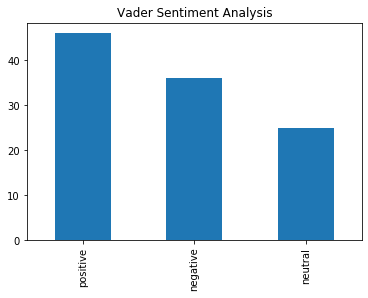

In [122]:
df.vader_sentiment.value_counts().plot(kind='bar',title="Vader Sentiment Analysis")

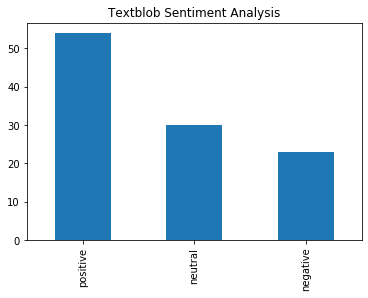

In [123]:
df.tb_sentiment.value_counts().plot(kind='bar',title="Textblob Sentiment Analysis")

In [143]:
negatives = df[df['tb_sentiment'] == 'negative']
positives = df[df['tb_sentiment'] == 'positive']

In [134]:
import nltk
import string
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list += string.punctuation
punct_list = ["''", '""', '...', '``']
stopwords_list += punct_list

In [137]:
def tokenize(tweet):
    tokens = nltk.word_tokenize(tweet)
    words_lower = [word.lower() for word in tokens]
    words_stopped = [word for word in words_lower if word not in stopwords_list]
    return words_stopped

In [147]:
processed_data_positive = list(map(tokenize, positives['clean_text_col']))

processed_data_positive[0]

['pfizer',
 'covid',
 'vaccine',
 'let',
 "'s",
 'salute',
 'golden',
 'oldies',
 'took',
 'shot',
 'https',
 '//t.co/tvlb9th4ir']

In [148]:
processed_data_negative = list(map(tokenize, negatives['clean_text_col']))

processed_data_negative[0]

['cold',
 'hard',
 'truth',
 'burned',
 'soul',
 'left',
 'doubt',
 'reason',
 'backhanded',
 'compliment',
 'forefront',
 'disgrace',
 'treason',
 'quotes',
 'loveislove',
 'tuesdaymotivations',
 'trending',
 'wednesdaymotivation',
 'comedy',
 'wednesdaythought',
 'lgbtq',
 'tuesdayvibe',
 'vaccine']

In [150]:
pos_tweet_concat = []
for tweet in processed_data_positive:
    pos_tweet_concat += tweet
    
pos_tweet_freqdist = FreqDist(pos_tweet_concat)
pos_tweet_freqdist.most_common(2000)

[('vaccine', 68),
 ('https', 58),
 ('covid19', 20),
 ('covid', 15),
 ('get', 10),
 ('’', 9),
 ("'s", 8),
 ('need', 6),
 ('coronavirus', 6),
 ('first', 6),
 ('health', 6),
 ('high', 6),
 ('pfizer', 5),
 ('one', 5),
 ('people', 5),
 ('california', 5),
 ('vaccines', 4),
 ('risk', 4),
 ('vaccineswork', 4),
 ('theory', 4),
 ('another', 4),
 ('world', 4),
 ('defends', 4),
 ('cost', 4),
 ('know', 4),
 ('healthy', 4),
 ('want', 3),
 ('us', 3),
 ('communities', 3),
 ('covid_19', 3),
 ('less', 3),
 ('germ', 3),
 ('denial', 3),
 ('–', 3),
 ('favorite', 3),
 ('anti-', 3),
 ('grifters', 3),
 ('vaccinesavelives', 3),
 ('among', 3),
 ('black', 3),
 ('made', 3),
 ('day', 3),
 ('today', 3),
 ('women', 3),
 ('shots', 3),
 ('find', 3),
 ('host', 3),
 ('free', 3),
 ('required', 3),
 ('read', 3),
 ('news', 3),
 ('reopening', 3),
 ('californiareopening', 3),
 ('g8check', 3),
 ('vaccination', 3),
 ('doctor', 3),
 ('make', 3),
 ('like', 3),
 ('state', 3),
 ('open', 3),
 ('right', 3),
 ('doctors', 3),
 ("n't",

In [155]:
neg_tweet_concat = []
for tweet in processed_data_negative:
    neg_tweet_concat += tweet
    
neg_tweet_freqdist = FreqDist(neg_tweet_concat)
neg_tweet_freqdist.most_common(2000)

[('vaccine', 24),
 ('https', 19),
 ('covid19', 12),
 ('people', 5),
 ('–', 5),
 ('vaccineswork', 5),
 ('like', 4),
 ('covid', 4),
 ('pregnancy', 4),
 ('uptake', 4),
 ('lagging', 4),
 ('behind', 4),
 ('average', 4),
 ('//t.co/wqcxoydim9', 4),
 ('vaccinessavelives', 4),
 ('’', 4),
 ('u', 3),
 ("n't", 3),
 ('usa', 3),
 ('‘', 3),
 ('vaccinated', 3),
 ('vaccines', 3),
 ('coronavirus', 3),
 ('covidvaccine', 3),
 ('game', 3),
 ("'re", 3),
 ('hour_pm', 3),
 ('hard', 2),
 ('infected', 2),
 ('get', 2),
 ('means', 2),
 ('cure', 2),
 ('lost', 2),
 ('incentives', 2),
 ('covid-19', 2),
 ('paying', 2),
 ('via', 2),
 ('pills', 2),
 ('united', 2),
 ('states', 2),
 ('skepticalraptor', 2),
 ('every', 2),
 ('day', 2),
 ('//', 2),
 ('newsom', 2),
 ('gives', 2),
 ('one', 2),
 ('think', 2),
 ('novavax', 2),
 ('eu', 2),
 ("'s", 2),
 ("'ve", 2),
 ('first', 2),
 ('dodgers', 2),
 ('hospitalized', 2),
 ('nbcnews', 2),
 ('2', 2),
 ('podcast', 2),
 ('cold', 1),
 ('truth', 1),
 ('burned', 1),
 ('soul', 1),
 ('left',

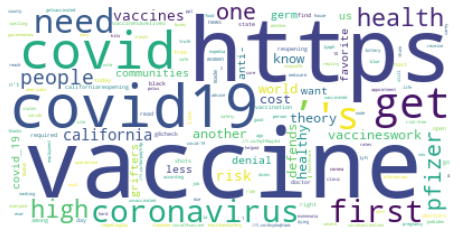

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", max_words=2000)
wc.generate_from_frequencies(pos_tweet_freqdist)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()


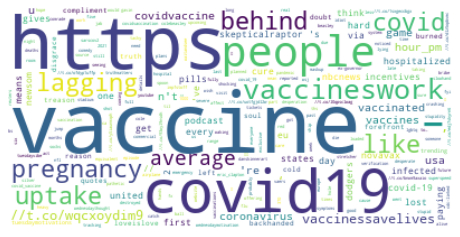

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", max_words=2000)
wc.generate_from_frequencies(neg_tweet_freqdist)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()